<a href="https://colab.research.google.com/github/Harithapisharody/trafficsignclassification/blob/main/inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Libraries
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import os
import cv2
import PIL.Image
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

set path to dataset

In [3]:
train_dir='/content/drive/MyDrive/newtrafficsign/train'
validation_dir='/content/drive/MyDrive/newtrafficsign/test'

setting the parameters

In [4]:
num_classes=85
image_size=(299,299)
batch_size=32
learning_rate=0.001
epochs=10

preprocessing and augment the training data

In [5]:
train_datagen=ImageDataGenerator(
                 horizontal_flip=True,
                #  vertical_flip=True,
                 rescale=1. / 255,
                #  validation_split=0.1,
                 shear_range=0.2,
                 zoom_range=0.2,
                #  width_shift_range=0.1,
                #  height_shift_range=0.1,
                #  rotation_range=30,
)

preprocess the validation data

In [6]:
valid_datagen=ImageDataGenerator(rescale=1 / 255,
                                # validation_split=0.1,
                                 )

load the InceptionV3 model

In [7]:
# Initializing InceptionV3 (pretrained) model with input image shape
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0],image_size[1],3))


adding the additional top layer for the model

In [8]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(num_classes,activation='softmax')(x)

combine base model with  top layer

In [9]:
model=Model(inputs=base_model.input,outputs=predictions)

Freeze the layers in base model

In [10]:
for layer in base_model.layers:
  layer.trainable=False

compile the model

In [11]:
model.compile(optimizer=Adam(learning_rate=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])

generate the training and validation data from directories

In [12]:

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator=valid_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4438 images belonging to 85 classes.
Found 1288 images belonging to 85 classes.


train the model

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.n// batch_size
)

Epoch 1/10
 20/138 [===>..........................] - ETA: 32:42 - loss: 3.6551 - accuracy: 0.1953

save the trained model

In [ ]:
model.save('/content/drive/MyDrive/inceptionv3_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model

Saving 1.jpg to 1.jpg
1/1 [==============================] - 2s 2s/step


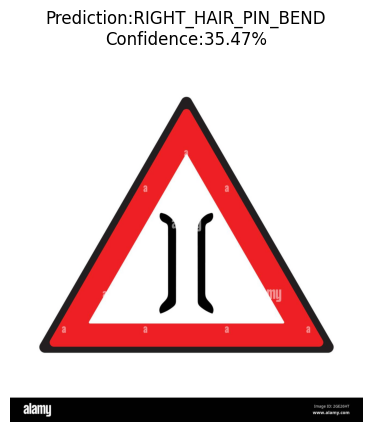

In [10]:
model=tf.keras.models.load_model('/content/drive/MyDrive/inceptionv3_model.h5')

class_labels = {0: 'ALL_MOTOR_VEHICLE_PROHIBITED', 1: 'AXLE_LOAD_LIMIT', 2: 'BARRIER_AHEAD', 3: 'BULLOCK_AND_HANDCART_PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
              6: 'COMPULSARY_AHEAD', 7: 'COMPULSARY_AHEAD_OR_TURN_LEFT', 8: 'COMPULSARY_AHEAD_OR_TURN_RIGHT', 9: 'COMPULSARY_CYCLE_TRACK',10: 'COMPULSARY_KEEP_RIGHT',11: 'COMPULSARY_KEEP_RIGHT',12: 'COMPULSARY_MINIMUM_SPEED',13: 'COMPULSARY_SOUND_HORN',14: 'COMPULSARY_TURN_LEFT',
             15: 'COMPULSARY_TURN_LEFT_AHEAD',16: 'COMPULSARY_TURN_RIGHT',17: 'COMPULSARY_TURN_RIGHT_AHEAD',18: 'CROSS_ROAD',19: 'CYCLE_CROSSING',20: 'CYCLE_PROHIBITED',21: 'DANGEROUS_DIP',
             22: 'DIRECTION',23: 'FALLING_ROCKS',24: 'FERRY',25: 'GAP_IN_MEDIAN',26: 'GIVE_WAY',27: 'GUARDED_LEVEL_CROSSING',28: 'HANDCART_PROHIBITED',
             29: 'HEIGHT_LIMIT',30: 'HORN_PROHIBITED',31: 'HUMP_OR_ROUGH_ROAD',32: 'LEFT_HAIR_PIN_BEND',33: 'LEFT_HAND_CURVE',34: 'LEFT_REVERSE_BEND',35: 'LEFT_TURN_PROHIBITED',
             36: 'LENGTH_LIMIT',37: 'LOAD_LIMIT',38: 'LOOSE_GRAVEL',39: 'MEN_AT_WORK',40: 'NARROW_BRIDGE',41: 'NARROW_ROAD_AHEAD',42: 'NO_ENTRY',
             43: 'NO_PARKING',44: 'NO_STOPPING_OR_STANDING',45: 'OVERTAKING_PROHIBITED',46: 'PASS_EITHER_SIDE',47: 'PEDESTRIAN_CROSSING',48: 'PEDESTRIAN_PROHIBITED',49: 'PRIORITY_FOR_ONCOMING_VEHICLES',
             50: 'QUAY_SIDE_OR_RIVER_BANK',51: 'RESTRICTION_ENDS',52: 'RIGHT_HAIR_PIN_BEND',53: 'RIGHT_HAND_CURVE',54: 'RIGHT_REVERSE_BEND',55: 'RIGHT_TURN_PROHIBITED',56: 'ROAD_WIDENS_AHEAD',
             57: 'ROUNDABOUT',58: 'SCHOOL_AHEAD',59: 'SIDE_ROAD_LEFT',60: 'SIDE_ROAD_RIGHT',61: 'SLIPPERY_ROAD',62: 'SPEED_LIMIT_15',63: 'SPEED_LIMIT_20',
             64: 'SPEED_LIMIT_30',65: 'SPEED_LIMIT_40',66: 'SPEED_LIMIT_5',67: 'SPEED_LIMIT_50',68: 'SPEED_LIMIT_60',69: 'SPEED_LIMIT_70',70: 'SPEED_LIMIT_80',
             71: 'STAGGERED_INTERSECTION',72: 'STEEP_ASCENT',73: 'STEEP_DESCENT',74: 'STOP',75: 'STRAIGHT_PROHIBITED',76: 'TONGA_PROHIBITED',77: 'TRAFFIC_SIGNAL',
             78: 'TRUCK_PROHIBITED',79: 'TURN_RIGHT',80: 'T_INTERSECTION',81: 'UNGUARDED_LEVEL_CROSSING',82: 'U_TURN_PROHIBITED',83: 'WIDTH_LIMIT',84: 'Y_INTERSECTION',}
def preprocess_image(image_path):
  img=PIL.Image.open(image_path)
  img=img.resize((299,299))
  img=np.array(img)/255.0
  img=np.expand_dims(img,axis=0)
  return img

def predict_sign(image_path):
  processed_image=preprocess_image(image_path)
  predictions=model.predict(processed_image)
  predicted_label=class_labels[np.argmax(predictions)]
  confidence=np.max(predictions)
  return predicted_label,confidence

from google.colab import files
uploaded=files.upload()

uploaded_file_path=list(uploaded.keys())[0]

prediction,confidence=predict_sign(uploaded_file_path)

img=PIL.Image.open(uploaded_file_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction:{prediction}\nConfidence:{confidence:.2%}')
plt.show()




In [12]:
!pip install gtts


Saving 81040.jpg to 81040.jpg
1/1 [==============================] - 2s 2s/step


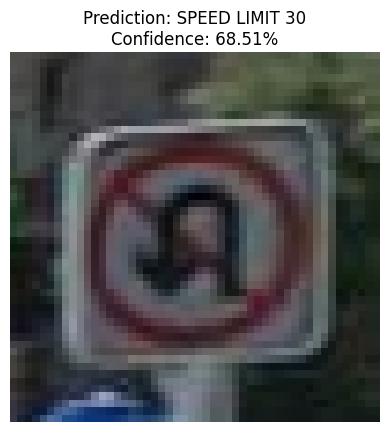

In [14]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from gtts import gTTS
import IPython.display as ipd

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/inceptionv3_model.h5')

# Define class labels
class_labels = {0: 'ALL MOTOR VEHICLE PROHIBITED', 1: 'AXLE LOAD LIMIT', 2: 'BARRIER AHEAD', 3: 'BULLOCK AND HANDCART PROHIBITED', 4: 'Dragonfly', 5: 'CATTLE',
                6: 'COMPULSARY AHEAD', 7: 'COMPULSARY AHEAD OR TURN LEFT', 8: 'COMPULSARY AHEAD OR TURN RIGHT', 9: 'COMPULSARY CYCLE TRACK',10: 'COMPULSARY KEEP RIGHT',11: 'COMPULSARY KEEP RIGHT',12: 'COMPULSARY MINIMUM SPEED',13: 'COMPULSARY SOUND HORN',14: 'COMPULSARY TURN LEFT',
                15: 'COMPULSARY TURN LEFT AHEAD',16: 'COMPULSARY TURN RIGHT',17: 'COMPULSARY TURN RIGHT AHEAD',18: 'CROSS ROAD',19: 'CYCLE CROSSING',20: 'CYCLE PROHIBITED',21: 'DANGEROUS DIP',
                22: 'DIRECTION',23: 'FALLING ROCKS',24: 'FERRY',25: 'GAP IN MEDIAN',26: 'GIVE WAY',27: 'GUARDED LEVEL CROSSING',28: 'HANDCART PROHIBITED',
                29: 'HEIGHT LIMIT',30: 'HORN PROHIBITED',31: 'HUMP OR ROUGH ROAD',32: 'LEFT HAIR PIN BEND',33: 'LEFT HAND CURVE',34: 'LEFT REVERSE BEND',35: 'LEFT TURN PROHIBITED',
                36: 'LENGTH LIMIT',37: 'LOAD LIMIT',38: 'LOOSE GRAVEL',39: 'MEN AT WORK',40: 'NARROW BRIDGE',41: 'NARROW ROAD AHEAD',42: 'NO ENTRY',
                43: 'NO PARKING',44: 'NO STOPPING OR STANDING',45: 'OVERTAKING PROHIBITED',46: 'PASS EITHER SIDE',47: 'PEDESTRIAN CROSSING',48: 'PEDESTRIAN PROHIBITED',49: 'PRIORITY FOR ONCOMING VEHICLES',
                50: 'QUAY SIDE OR RIVER BANK',51: 'RESTRICTION ENDS',52: 'RIGHT HAIR PIN BEND',53: 'RIGHT HAND CURVE',54: 'RIGHT REVERSE BEND',55: 'RIGHT TURN PROHIBITED',56: 'ROAD WIDENS AHEAD',
                57: 'ROUNDABOUT',58: 'SCHOOL AHEAD',59: 'SIDE ROAD LEFT',60: 'SIDE ROAD RIGHT',61: 'SLIPPERY ROAD',62: 'SPEED LIMIT 15',63: 'SPEED LIMIT 20',
                64: 'SPEED LIMIT 30',65: 'SPEED LIMIT 40',66: 'SPEED LIMIT 5',67: 'SPEED LIMIT 50',68: 'SPEED LIMIT 60',69: 'SPEED LIMIT 70',70: 'SPEED LIMIT 80',
                71: 'STAGGERED INTERSECTION',72: 'STEEP ASCENT',73: 'STEEP DESCENT',74: 'STOP',75: 'STRAIGHT PROHIBITED',76: 'TONGA PROHIBITED',77: 'TRAFFIC SIGNAL',
                78: 'TRUCK PROHIBITED',79: 'TURN RIGHT',80: 'T INTERSECTION',81: 'UNGUARDED LEVEL CROSSING',82: 'U TURN PROHIBITED',83: 'WIDTH LIMIT',84: 'Y INTERSECTION'}

# Function to preprocess the image
def preprocess_image(image_path):
    img = PIL.Image.open(image_path)
    img = img.resize((299, 299))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict the sign
def predict_sign(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_label, confidence

# Upload image
uploaded = files.upload()
uploaded_file_path = list(uploaded.keys())[0]

# Make prediction
prediction, confidence = predict_sign(uploaded_file_path)

# Show image and prediction
img = PIL.Image.open(uploaded_file_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {prediction}\nConfidence: {confidence:.2%}')
plt.show()

# Convert prediction text to speech
tts = gTTS(text=prediction, lang='en')
tts.save("prediction.mp3")
ipd.Audio("prediction.mp3", autoplay=True)
